In [1]:
import sys
sys.path.append('../..')

from src.var_like import VarLikeModel

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import IPython.display as display

import warnings
warnings.filterwarnings("ignore")

In [3]:
time_serires_data = pd.read_excel('../../data/Learning_data_part1.xlsx')
time_serires_data.head()

,t,TS_0_coord_0,TS_1_coord_0,TS_2_coord_0,TS_3_coord_0,TS_4_coord_0,TS_5_coord_0,TS_6_coord_0,TS_7_coord_0,TS_8_coord_0,...,TS_30_coord_0,TS_31_coord_0,TS_32_coord_0,TS_33_coord_0,TS_34_coord_0,TS_35_coord_0,TS_36_coord_0,TS_37_coord_0,TS_38_coord_0,TS_39_coord_0
0,0,781.321365,775.966551,783.556732,771.280607,774.027931,777.959926,778.333318,778.183194,777.730134,...,775.488759,774.453930,773.188746,782.604506,774.217891,770.517303,773.841527,776.317916,776.760978,776.302157
1,1,777.294585,770.969730,779.097647,774.496980,773.775710,775.824789,775.591972,775.609835,774.532663,...,780.611902,782.928436,776.325164,779.177942,778.295495,776.679858,777.553003,772.785652,771.341136,773.685647
2,2,777.279457,781.374014,775.251241,776.724171,778.570462,780.465355,778.674903,771.862333,776.136027,...,778.592946,778.360002,777.322556,775.467944,776.677131,777.434007,775.273394,779.792243,778.046031,780.699803
3,3,779.030353,779.770403,774.373064,773.948711,774.675375,776.057615,778.948863,781.992196,775.421832,...,773.255963,771.479581,772.733706,778.036888,780.817795,775.236540,779.256064,779.933936,780.991255,777.648504
4,4,775.434026,777.144336,776.488376,778.314061,771.568250,780.918985,783.224207,772.358862,775.076323,...,778.985693,778.815208,765.283825,777.747031,772.512745,784.579475,783.162572,779.826215,776.169419,776.462723


In [4]:
num_series = time_serires_data.shape[1] - 1
num_series

40

In [5]:
anwser_array = np.empty((num_series, 2))

In [6]:
for series_num in range(1, time_serires_data.shape[1]):
    cur_series = time_serires_data.iloc[:, series_num].values
    cur_series = cur_series.reshape((-1, 1))

    var_model = VarLikeModel(cur_series)
    window_size = 50

    cur_answer = var_model.find_discordance_point(window_size)
    anwser_array[series_num - 1] = cur_answer

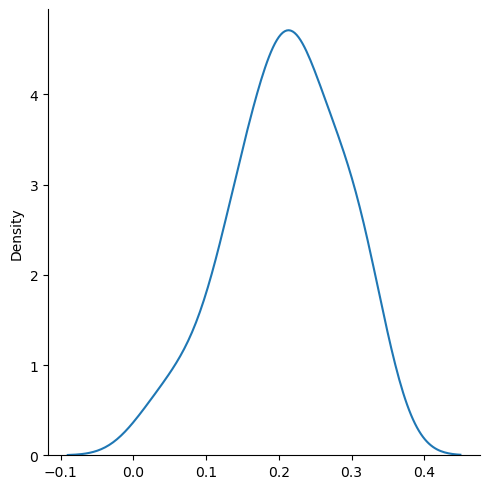

In [7]:
sns.displot(anwser_array[:, 1], kind="kde")

In [8]:
# transform confidence to be summed into 1
confidence = anwser_array[:, 1].copy()

confindence_new_1 = 1 / (confidence[confidence < 0.4]) - (1 / 0.4)
confindence_new_2 = np.exp(3 * confidence[confidence >= 0.4]) - np.exp(0.4)

indxs_1 = confidence < 0.4
indxs_2 = confidence >= 0.4

confidence[indxs_1] = confindence_new_1
confidence[indxs_2] = confindence_new_2

confidence /= np.sum(confidence)
confidence

array([0.00698582, 0.01363393, 0.01162159, 0.00993062, 0.01246335,
       0.01007932, 0.00470157, 0.01033247, 0.00688789, 0.02311229,
       0.28726359, 0.0193433 , 0.02310727, 0.02612203, 0.0278725 ,
       0.00396761, 0.00908868, 0.01591512, 0.00304293, 0.04785569,
       0.00550495, 0.01280966, 0.02849928, 0.09747216, 0.00580633,
       0.00794786, 0.00451525, 0.00503079, 0.03239837, 0.01730617,
       0.01557444, 0.01498183, 0.00274147, 0.06418361, 0.01637415,
       0.01319178, 0.02200409, 0.0148349 , 0.009604  , 0.03589134])

In [9]:
confidence.sum()

1.0

In [10]:
num_candies = 100000 // 4

confidence *= num_candies
confidence = confidence.astype(np.int32)

In [11]:
confidence.sum()

24979

In [12]:
discord_inds = anwser_array[:, 0].astype(np.int32)

In [13]:
answer_frame = pd.DataFrame(data=np.concatenate((discord_inds.reshape((-1, 1)), confidence.reshape((-1, 1))), axis=1), 
                            columns=['T', 'D'],
                )
answer_frame.head()

,T,D
0,10001,174
1,10001,340
2,10001,290
3,10001,248
4,10001,311


In [14]:
answer_frame.to_excel('./answers_part1.xlsx')